<a href="https://colab.research.google.com/github/harishmuh/Deep-Learning_study/blob/main/Single_perceptron_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Single Layer Perceptron**

In this tutorial we will learn about perceptron. The single perceptron is one of the simplest artificial neural network architecture. The decision boundary of each output is linear, so single perceptron is incapable to learn complex patterns (just like logistic regression classifiers).

**About dataset**

The full Iris dataset has 3 classes, but a single perceptron can only solve binary, linearly separable problems.

Therefore, we will:

Use only two classes

* Setosa (0)

* Versicolor (1)

Use two features for visualization:

1. `sepal length`

2. `sepal width`

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Iris dataset
from sklearn.datasets import load_iris

# Sklearn, tensorflow and keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
# Loading dataset
iris = load_iris()
X = iris.data[:, :2]      # sepal length, sepal width
y = iris.target

In [3]:
# Dataframe

# displaying feaures
df = pd.DataFrame(X)

display(df.head(), df.tail())

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


,0,1
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4
149,5.9,3.0


In [4]:
# Selecting only 'sepal length' and 'sepal width' columns
df = pd.DataFrame(X, columns=['sepal length', 'sepal width'])

# Adding target
df['target'] = y

display(df.head(), df.tail())

,sepal length,sepal width,target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


,sepal length,sepal width,target
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2
149,5.9,3.0,2


In [5]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   target        150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


In [7]:
# Keeping only Setosa (0) and Versicolor (1)
# Applying mask as filter
mask = y < 2
X = X[mask]
y = y[mask]

In [8]:
# We will get only the features of setosa and versicolor after filtering with mask
#pd.Series(y).value_counts()

In [9]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Building Single Perceptron Model (using Keras)
model = Sequential([
    Dense(
        units=1,
        input_shape=(2,),
        activation='sigmoid'   # logistic perceptron
    )
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compiling model # SGD
model.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [12]:
# Model training
history = model.fit(
    X_scaled,
    y,
    epochs=200,
    verbose=0
)


In [13]:
# Evaluate accuracy
loss, acc = model.evaluate(X_scaled, y, verbose=0)
print(f"Training Accuracy: {acc:.3f}")


Training Accuracy: 0.990


In [14]:
# Visualization
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]


In [15]:
Z = model.predict(grid)
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


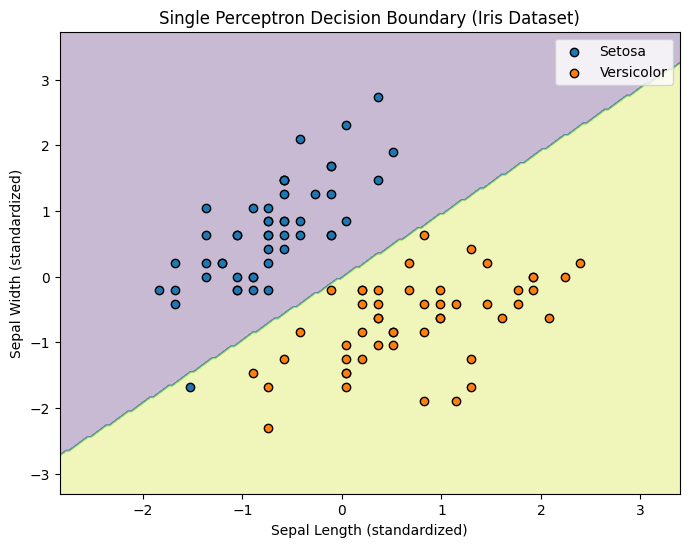

In [16]:
# Visualization
plt.figure(figsize=(8, 6))

# Decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)

# Scatter plot of data points
plt.scatter(
    X_scaled[y == 0, 0],
    X_scaled[y == 0, 1],
    label="Setosa",
    edgecolor="k"
)

plt.scatter(
    X_scaled[y == 1, 0],
    X_scaled[y == 1, 1],
    label="Versicolor",
    edgecolor="k"
)

plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.title("Single Perceptron Decision Boundary (Iris Dataset)")
plt.legend()
plt.show()


In overall, the result displays that Iris Setosa vs Iris Versicolor is linearly separable. Though, there is a minor mistake (we got 0.99 of training accuracy).

In [17]:
# Inspecting learned parameters
weights, bias = model.layers[0].get_weights()
print("Weights:", weights.ravel())
print("Bias:", bias)


Weights: [ 1.3390461 -1.3947221]
Bias: [-0.008657]


Based on the result, the learned model probability equation (z):

z=1.339x-length​ − 1.395x-width​ − 0.0087

If sepal length increases (holding everything else constant),

* Probability of class 1 (Versicolor) increases

* Probability of class 0 (Setosa) decreases